# 计数接触邻居

在这个笔记本中，我们通过绘制网格来可视化组织中哪些细胞是邻居。此外，我们可以改变网格的强度，使其与细胞质心之间的距离相对应。

In [1]:
import pyclesperanto_prototype as cle
import numpy as np
import pandas as pd

# 测试数据
让我们生成一些类似组织的结构，由通常有大约6个邻居的细胞组成。

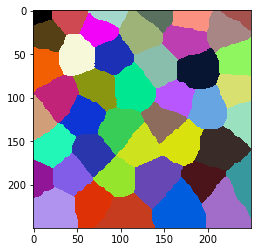

In [2]:
cells = cle.artificial_tissue_2d(
    delta_x=48, 
    delta_y=32, 
    random_sigma_x=7, 
    random_sigma_y=7, 
    width=250, 
    height=250)

cle.imshow(cells, labels=True)

## 邻近细胞之间的网格

在计数邻居之前，我们应该可视化邻居关系。我们可以通过在接触的邻近细胞的质心之间绘制网格来实现这一点。

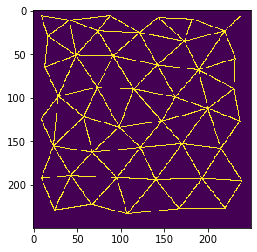

In [3]:
mesh = cle.draw_mesh_between_touching_labels(cells)

cle.imshow(mesh)

我们还可以在一张图像中结合这两种可视化。请注意，这些图像不应该被进一步用于定量分析。它仅用于可视化目的。

## 质心连接和细胞边界
在这种情况下，可视化组织的常见方法是用不同的颜色绘制细胞边界和质心网格。

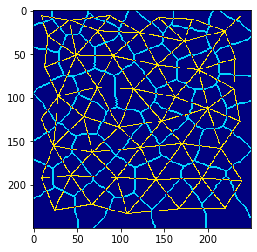

In [4]:
visualization = mesh * 2 + cle.detect_label_edges(cells)

cle.imshow(visualization, color_map='jet')

## 分析和可视化接触邻居的数量
我们还可以计算接触的邻居数量，并将结果以参数图像的形式用颜色可视化。

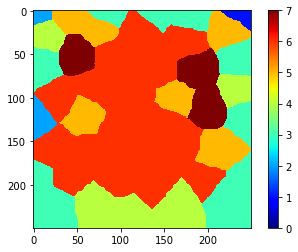

In [5]:
neighbor_count_image = cle.touching_neighbor_count_map(cells)

cle.imshow(neighbor_count_image, color_map='jet', colorbar=True, min_display_intensity=0)

请注意，沿图像边界的数字可能不准确。因此，我们应该将相应的细胞从进一步的分析中排除。

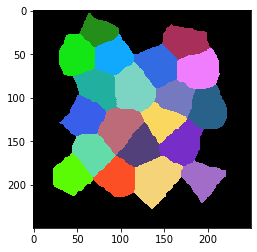

In [6]:
cells_ex_border = cle.exclude_labels_on_edges(cells)

cle.imshow(cells_ex_border, labels=True)

在修正标签图像后，我们还可以修正参数图像。

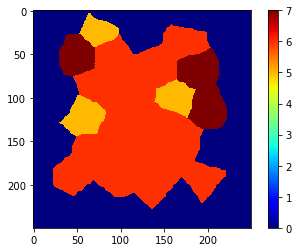

In [7]:
neighbor_count_image_ex_border = neighbor_count_image * (cells_ex_border != 0)

cle.imshow(neighbor_count_image_ex_border, color_map='jet', colorbar=True, min_display_intensity=0)

现在，我们可以测量邻居的数量。我们可以只读取这些数字并将它们放在一个列表中...

In [8]:
cle.read_intensities_from_map(cells_ex_border, neighbor_count_image_ex_border)

cl.Array([[0., 5., 6., 7., 6., 6., 7., 6., 6., 5., 5., 6., 6., 7., 6., 6.,
        6., 6., 6., 6., 6.]], dtype=float32)

...我们还可以将这些值与所有其他统计数据一起读取，并将它们放入pandas DataFrame中。

In [9]:
statistics = cle.statistics_of_labelled_pixels(neighbor_count_image_ex_border, cells_ex_border)

table = pd.DataFrame(statistics)

# 重命名一列
table = table.rename(columns={"mean_intensity": "number_of_neighbors"})

# 只筛选出所有列的一个子集；只保留我们关心的
table = table[["label", "number_of_neighbors", "centroid_x", "centroid_y"]]

table

label  number_of_neighbors  centroid_x  centroid_y
0       1                  5.0   74.592697   23.731028
1       2                  6.0  173.741379   35.582230
2       3                  7.0   49.460915   51.928082
3       4                  6.0   91.783768   52.666199
4       5                  6.0  142.728210   62.962471
5       6                  7.0  189.973206   68.526794
6       7                  6.0   73.699181   88.797356
7       8                  6.0  115.321083   90.665649
8       9                  5.0  163.097733   99.824242
9      10                  5.0   58.206852  122.341309
10     11                  6.0   98.847565  134.280228
11     12                  6.0  147.731705  127.326218
12     13                  7.0  200.522903  112.817368
13     14                  6.0   67.880905  162.991592
14     15                  6.0  122.943306  157.515717
15     16                  6.0  171.010025  153.333328
16     17                  6.0   43.426266  189.492981
17     18                  6.0   96.272728  192.326477
18     19                  6.0  140.815964  194.446030
19     20                  6.0  193.817596  193.019318

# 练习
分析一个包含更多细胞的更大视野，并变化`artificial_tissue_2d`函数的`random_sigma_x`和`random_sigma_y`参数。使用接触邻居计数图来计算在应用中值滤波器到地图之前和之后的接触邻居数量。